In [146]:
import math
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt

## Here is our query and text 

In [143]:
query = 'rabbit hole'

db_of_texts = [
    "There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, Oh dear! Oh dear! I shall be late! (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and then hurried on, Alice started to her feet, for it flashed across her mind that she had never before seen a rabbit with either a waistcoat-pocket, or a watch to take out of it, and burning with curiosity, she ran across the field after it, and fortunately was just in time to see it pop down a large rabbit-hole under the hedge.",
    "Rabbit Hole is what we are looking for"
]

# clear out of special characters, make lower case
db_of_texts = [x.replace(';', ' ').replace('-', ' ').replace(', ', ' ').lower() for x in db_of_texts]


## Simplest case: Exact match search

In [53]:
q_words = query.split(" ")

In [144]:
# look for the fist word "rabbit" in all textes
for idx, text in enumerate(db_of_texts):
    if q_words[0] in text:
        print(f'<{q_words[0]}> has been found in text #{idx}')

<rabbit> has been found in text #0
<rabbit> has been found in text #1


## Representing text as a vector (BofW)

In [56]:
def text2vector(text: str, corpus: set):
    text_vector = dict.fromkeys(corpus, 0)   # initialize corpus with zero values
    
    for word in text.split(" "):
        text_vector[word] += 1
        
    return text_vector    

In [145]:
corpus = set(db_of_texts[0].split(" ")).union(set(db_of_texts[1].split(" ")))

db_vectors = [text2vector(x,corpus) for x in db_of_texts]

#show first 7 values of our vector
list(db_vectors[0].items())[:7]

[('', 2),
 ('to', 7),
 ('think', 1),
 ('late!', 1),
 ('shall', 1),
 ('after', 1),
 ('much', 1)]

## Calculate a vector representation for our query

In [62]:
query_vector = text2vector(query, corpus)
query_vector

{'': 0,
 'to': 0,
 'think': 0,
 'late!': 0,
 'shall': 0,
 'after': 0,
 'much': 0,
 'mind': 0,
 'nor': 0,
 'pop': 0,
 'way': 0,
 'hurried': 0,
 'or': 0,
 'watch': 0,
 'that': 0,
 'hole': 1,
 'have': 0,
 'ought': 0,
 'afterwards': 0,
 'all': 0,
 'alice': 0,
 'actually': 0,
 'hear': 0,
 'oh': 0,
 'when': 0,
 'natural)': 0,
 'looking': 0,
 'of': 0,
 'see': 0,
 'took': 0,
 'what': 0,
 'fortunately': 0,
 'very': 0,
 'she': 0,
 'either': 0,
 'wondered': 0,
 'we': 0,
 'over': 0,
 'just': 0,
 'there': 0,
 '(when': 0,
 'a': 0,
 'burning': 0,
 'this': 0,
 'large': 0,
 'before': 0,
 'across': 0,
 'her': 0,
 'say': 0,
 'at': 0,
 'did': 0,
 'never': 0,
 'time': 0,
 'seemed': 0,
 'curiosity': 0,
 'seen': 0,
 'for': 0,
 'field': 0,
 'hedge.': 0,
 'waistcoat': 0,
 'looked': 0,
 'in': 0,
 'be': 0,
 'started': 0,
 'itself': 0,
 'ran': 0,
 'down': 0,
 'it': 0,
 'under': 0,
 'so': 0,
 'with': 0,
 'is': 0,
 'dear!': 0,
 'on': 0,
 'but': 0,
 'pocket': 0,
 'occurred': 0,
 'its': 0,
 'remarkable': 0,
 'quite':

## Find a most relevant text to  a query: Hamming Distance

In [97]:
# calculate a hammig distance between vec1 and vec2 given corpus dictionary
def hamming_distance(vec1: dict, vec2: dict, corpus: list):
    hamming_distance = 0
    
    for word in corpus:
        if vec1[word] != vec2[word]:
            hamming_distance += 1
    
    return hamming_distance
        

In [67]:
print(hamming_distance(query_vector, db_vectors[0], corpus))

print(hamming_distance(query_vector, db_vectors[1], corpus))

88
6


In [165]:
df = pd.DataFrame([query_vector, db_vectors[0]]).T
df['is_number_of_words_same'] = df.apply(lambda row: 1 if row[0]==row[1] else 0, axis=1)
df = df.rename(columns={0: 'query_words', 1: 'text_words'})
df.head()

,query_words,text_words,is_number_of_words_same
,0,2,0
to,0,7,0
think,0,1,0
late!,0,1,0
shall,0,1,0


In [164]:
df[34:45].tail()

,query_words,text_words,is_number_of_words_same
(when,0,0,1
a,0,0,1
burning,0,0,1
this,0,0,1
large,0,0,1


we can see that with humming distance the second text is closer to our query, which is not quite what we looking for... both texts are discussing Rabbit holes, the first one is just bigger that is why we have more mismatches and as a result a longer distance

## Euclidian vs Cosine distance

In [78]:
def euclidean_distance(vector1, vector2):
    x1, y1 = vector1
    x2, y2 = vector2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

def cosine_distance(vector1, vector2):
    x1, y1 = vector1
    x2, y2 = vector2
    
    # Calculate dot product
    dot_product = x1 * x2 + y1 * y2
    
    # Calculate magnitudes
    magnitude1 = math.sqrt(x1**2 + y1**2)
    magnitude2 = math.sqrt(x2**2 + y2**2)
    
    # Calculate cosine distance
    cosine_distance = 1 - (dot_product / (magnitude1 * magnitude2))
    
    return cosine_distance

Let's imagine we have a query text with equal numer of keywords(converted to a vector) and two texts to compare.

First text has a slitly different proportion of keywords, literally number of hole words is 2x from rabbit, then calculate both Euclidian and Cosine distances between query and this text.

Since the proportion of words is different in query and text we have some greater then zero distance, so text are not the same.

In [139]:
# for simplisity lets imagine we have only two dimensions vectors
query = OrderedDict({'rabbit':1, "hole":1})
text1 = OrderedDict({'rabbit':1, "hole":2})

print(f'Euclidian distance = {euclidean_distance(query.values(), text1.values())}')
print(f'Cosine distance = {cosine_distance(query.values(), text1.values())}')

Euclidian distance = 1.0
Cosine distance = 0.05131670194948623


Now lets imagine that we have another text to compare, but that text is slighly longer, but has the same proportion of keywords (Rabbit and hole) and calculate both distances again

In [140]:
text2 = OrderedDict({'rabbit':2, "hole":4})

print(f'Euclidian distance = {euclidean_distance(query.values(), text2.values())}')
print(f'Cosine distance = {cosine_distance(query.values(), text2.values())}')

Euclidian distance = 3.1622776601683795
Cosine distance = 0.05131670194948623


Note, that Euclidian distance become larger, but cosine stays exactly the same and that is what we expected.

In case of cosine distance the size of the text does not influence the distance measure, only proportion of keywords

### Graphical illustration of why cosine distance is better

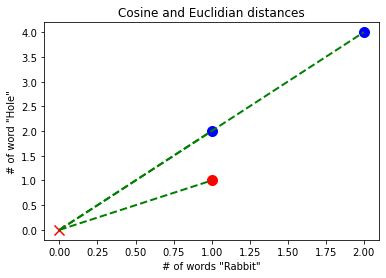

In [141]:
# Extract vector components
x = [query['rabbit'], text1['rabbit'], text2['rabbit']]
y = [query['hole'], text1['hole'], text2['hole']]

# Create a 2D scatter plot
plt.scatter(x[1:], y[1:], c='b', marker='o', s=100)  # Blue dots for text1 and text2
plt.scatter(x[0], y[0], c='r', marker='o', s=100)   # Red dot for the query


# Add zero points for both axes
plt.scatter(0, 0, c='r', marker='x', s=100)  # 'x' represents a red cross at the origin

# Set axis labels
plt.xlabel('# of words "Rabbit"')
plt.ylabel('# of word "Hole"')

# Set the title
plt.title('Cosine and Euclidian distances')

# Plot lines connecting the origin to each point
for i in range(len(x)):
    plt.plot([0, x[i]], [0, y[i]], linestyle='--', c='g', lw=2)

# Show the plot
plt.show()
